### Predict survival on the Titanic

In [1]:
#!pip3 install tensorflow

### Import Libraries

In [18]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

#import tensorflow as tf
#import tensorflow_decision_forests as tfdf

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


### Data Loading

In [2]:
train_data=pd.read_csv('../Titanic/train.csv')
#test_data=pd.read_csv('../Titanic/test.csv')

### Get Data Information

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      891 non-null    object 
 12  Sex_Category  891 non-null    int64  
 13  Alone         891 non-null    int64  
 14  Salutation    891 non-null    object 
dtypes: float64(2), int64(7), object(6)
memory usage: 104.5+ KB


In [4]:
#y=train_data["Survived"]
#features=["Sex","Pclass","SibSp","Parch"]
#X=pd.get_dummies(train_data[features])
#X_Test=pd.get_dummies(test_data[features])
#model=RandomForestClassifier(n_estimators=100,max_depth=5,random_state=1)
#model.fit(X,y)
#model.score(X,y)

### Function to normalise the row

In [20]:
def normalise_Alonerow(row):
    if row['SibSp'] == 0 and row['Parch'] == 0:
        return 1
    else:
        return 0

In [7]:
#train_data['Age'].fillna(value=train_data['Age'].mean(), inplace=True)
train_data['Sex_Category']=train_data['Sex'].replace(['male', 'female'],[0, 1])
train_data.loc[train_data["Embarked"].isnull()]
train_data['Alone']= 0
#train_data.loc[conditions,'Alone']=1
#train_data['Alone'] = train_data.apply(normalise_Alonerow,axis=1)
train_data.head()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           714 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      889 non-null    object 
 12  Sex_Category  891 non-null    int64  
 13  Alone         891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB


In [8]:
train_data[(train_data["Fare"].between(75.0,85.0)) & (train_data["Pclass"]==1) & (train_data["Cabin"].str[0]=="B")]
train_data['Embarked'].fillna(value='C', inplace=True)
train_data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          0
Sex_Category      0
Alone             0
dtype: int64

In [9]:
train_data['Salutation']=train_data['Name'].str.extract('([A-Za-z]+)\.',expand=False)

In [10]:
train_data['Age'].unique()


array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [13]:
train_data.loc[train_data["Age"].isnull()]['Salutation'].unique()
train_data["Age"]=train_data.groupby('Salutation')['Age'].apply(lambda x:x.fillna(x.median()))

In [14]:
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#train_data['Age']= imputer.fit_transform(train_data['Age']) 
#train_data.info()
#imputer.fit(train_data['Age'])

In [15]:
#train_data["Age"]=train_data.groupby('Salutation')['Age'].apply(lambda x:x.fillna(x.median()))
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      891 non-null    object 
 12  Sex_Category  891 non-null    int64  
 13  Alone         891 non-null    int64  
 14  Salutation    891 non-null    object 
dtypes: float64(2), int64(7), object(6)
memory usage: 104.5+ KB


In [16]:
# Create Column Transformer with 3 types of transformers
num_features = train_data.select_dtypes(exclude="object").columns
cat_features = train_data.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

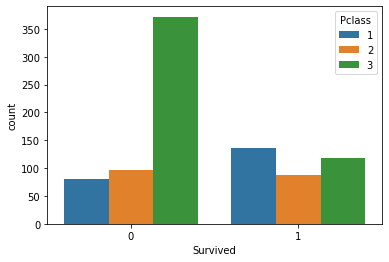

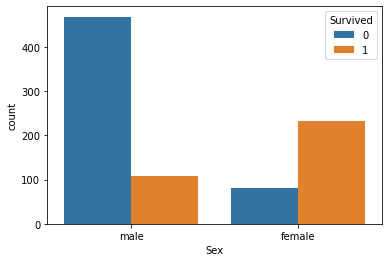

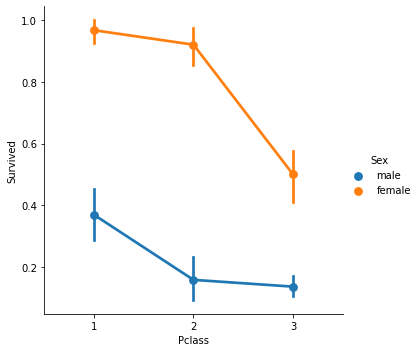

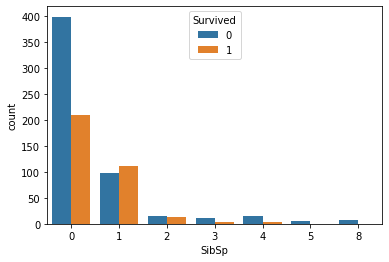

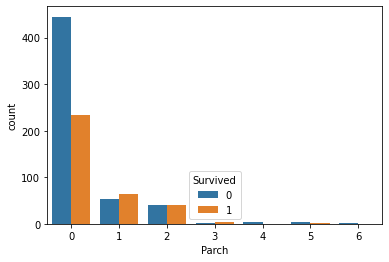

In [17]:
#train_data.describe(include='all')
#Women=train_data.loc[train_data.Sex == 'female']['Survived']
#men=train_data.loc[train_data.Sex == 'male']['Survived']
sb.countplot('Survived',hue='Pclass',data=train_data)
plt.show()
sb.countplot('Sex',hue='Survived',data=train_data)
plt.show()
pd.crosstab([train_data.Sex,train_data.Survived],train_data.Pclass,margins=True).style.background_gradient(cmap='summer_r')
sb.factorplot('Pclass', 'Survived', hue='Sex', data=train_data)
plt.show()
pd.crosstab(train_data.Salutation,train_data.Sex).T.style.background_gradient(cmap='summer_r')
sb.countplot('SibSp',hue='Survived',data=train_data)
plt.show()
sb.countplot('Parch',hue='Survived',data=train_data)
plt.show()
#sns.catplot(x='Survived',col='Age',kind='count',data=train_data)
#plt.show()
#sns.catplot(x='Survived',col='Sex',kind='count',data=train_data)
#plt.show()

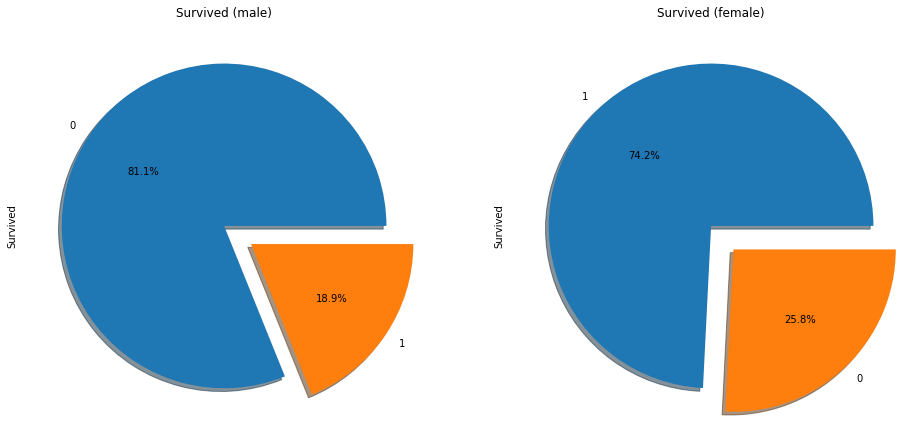

In [112]:
train_data.groupby('Salutation')['Age'].mean()

f,ax=plt.subplots(1,2,figsize=(16,10))
train_data['Survived'][train_data['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
train_data['Survived'][train_data['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()


In [35]:
y=train_data["Survived"]
features=["Sex","Pclass","SibSp","Parch","Age"]
#features=["Sex","Pclass","Age"]
X=pd.get_dummies(train_data[features])
#X_Test=pd.get_dummies(test_data[features])
model=RandomForestClassifier(n_estimators=100,max_depth=5,random_state=1)
model.fit(X,y)
model.score(X,y)

0.8473625140291807

In [243]:
#Womenrate=sum(Women)/len(Women)
#menrate=sum(men)/len(men)
#allrate=sum(all)/len(all)

<AxesSubplot:xlabel='Alone'>

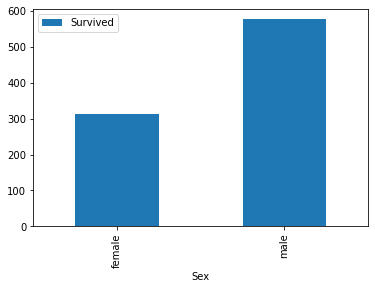

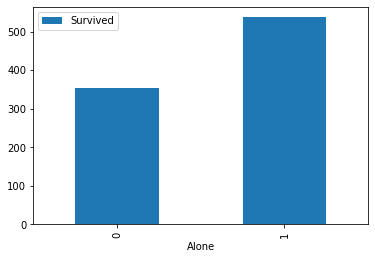

In [113]:
train_data.groupby(['Sex', 'Survived'])['Survived'].count()
train_data[['Sex','Survived']].groupby(['Sex']).count().plot.bar()

train_data.groupby(['Alone', 'Survived'])['Survived'].count()
train_data[['Alone','Survived']].groupby(['Alone']).count().plot.bar()


In [118]:
correlation = train_data[['Age', 'Fare']].corr()
print(correlation)
cross_tab = pd.crosstab(train_data['Pclass'], train_data['Survived'])
print(cross_tab)

           Age      Fare
Age   1.000000  0.097944
Fare  0.097944  1.000000
Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


### Features
PassengerId,Survived,Pclass,Age,Sex_Category,SibSp,Parch,Fare